<a href="https://colab.research.google.com/github/SidharthArya/Deep_Learning_Class_Manit/blob/main/Assignments/009_Autoencoders.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Auoencoders
An autoencoder is a type of artificial neural network used to learn efficient data codings in an unsupervised manner.

## Types
+ a simple autoencoder based on a fully-connected layer
+ a sparse autoencoder
+ a deep fully-connected autoencoder
+ a deep convolutional autoencoder
+ an image denoising model
+ a sequence-to-sequence autoencoder
+ a variational autoencoder

## Applications
+ Denoising
+ Dimensionality Reduction

## Basic Autoencoder

In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import tensorflow as tf
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split
from tensorflow.keras import layers, losses
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.models import Model

In [2]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

print (x_train.shape)
print (x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


In [3]:
latent_dim = 64 

class Autoencoder(Model):
  def __init__(self, latent_dim):
    super(Autoencoder, self).__init__()
    self.latent_dim = latent_dim   
    self.encoder = tf.keras.Sequential([
      layers.Flatten(),
      layers.Dense(latent_dim, activation='relu'),
    ])
    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28, 28))
    ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Autoencoder(latent_dim)

In [4]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())


In [5]:
autoencoder.fit(x_train, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0399 - val_loss: 0.0134
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0125 - val_loss: 0.0106
Epoch 3/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0104 - val_loss: 0.0098
Epoch 4/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0096 - val_loss: 0.0094
Epoch 5/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0093 - val_loss: 0.0093
Epoch 6/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0091 - val_loss: 0.0091
Epoch 7/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0090 - val_loss: 0.0090
Epoch 8/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 9/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0089 - val_loss: 0.0089
Epoch 10/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.008

In [6]:
autoencoder.predict(x_test)

array([[[5.61688864e-07, 3.50032735e-07, 2.01977582e-06, ...,
         4.37229872e-04, 5.61472007e-07, 3.58153159e-07],
        [1.47486548e-06, 6.77891603e-06, 7.10917720e-06, ...,
         4.29004431e-04, 7.06553459e-04, 3.29667472e-07],
        [5.31848091e-05, 1.60369200e-05, 1.78324935e-05, ...,
         5.88119030e-04, 1.43384933e-03, 4.38868999e-04],
        ...,
        [3.67268040e-05, 1.79767958e-05, 4.13809685e-05, ...,
         2.48362667e-05, 1.29669905e-04, 3.62336636e-04],
        [2.89848267e-05, 1.79867584e-05, 3.80525235e-05, ...,
         1.54164827e-05, 4.10061912e-05, 4.60356474e-04],
        [1.52689267e-06, 3.90904097e-05, 6.06329922e-05, ...,
         8.33458034e-05, 2.70426273e-04, 3.48301874e-05]],

       [[1.19540003e-10, 7.60512708e-10, 1.02798152e-08, ...,
         5.86060696e-06, 1.39252787e-09, 9.89583970e-11],
        [3.19492344e-09, 3.24105613e-08, 5.97991118e-07, ...,
         1.99556351e-04, 2.62492790e-06, 1.69355518e-09],
        [1.20744534e-08, 

In [7]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

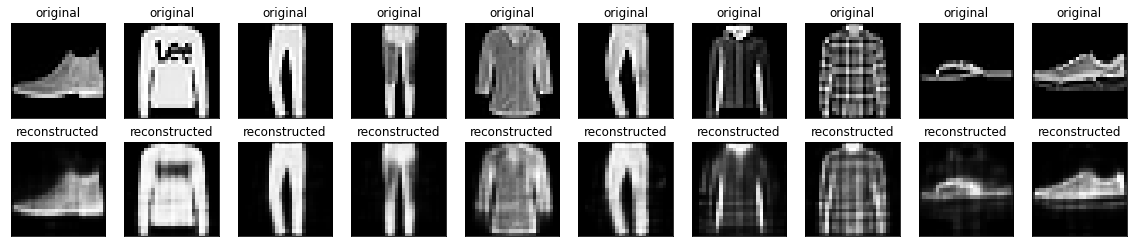

In [8]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):
  # display original
  ax = plt.subplot(2, n, i + 1)
  plt.imshow(x_test[i])
  plt.title("original")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)

  # display reconstruction
  ax = plt.subplot(2, n, i + 1 + n)
  plt.imshow(decoded_imgs[i])
  plt.title("reconstructed")
  plt.gray()
  ax.get_xaxis().set_visible(False)
  ax.get_yaxis().set_visible(False)
plt.show()

## Sparse Autoencoder

In [9]:
x_train.shape

(60000, 28, 28)

In [10]:
from keras import regularizers

encoding_dim = 32
class Sparse(Model):
  def __init__(self):
    super(Sparse, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)),
      layers.Flatten(),
      layers.Dense(encoding_dim, activation='relu', activity_regularizer=regularizers.l1(10e-5)),
    ])

    self.decoder = tf.keras.Sequential([
      layers.Dense(784, activation='sigmoid'),
      layers.Reshape((28,28,1))
      ])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded
autoencoder = Sparse()

In [11]:
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

In [12]:
autoencoder.fit(x_train, x_train,
                epochs=20,
                batch_size=256,
                shuffle=True,
                validation_data=(x_test, x_test))

Epoch 1/20
235/235 [==============================] - 3s 12ms/step - loss: 0.5117 - val_loss: 0.3467
Epoch 2/20
235/235 [==============================] - 3s 11ms/step - loss: 0.3388 - val_loss: 0.3277
Epoch 3/20
235/235 [==============================] - 3s 11ms/step - loss: 0.3227 - val_loss: 0.3172
Epoch 4/20
235/235 [==============================] - 3s 11ms/step - loss: 0.3132 - val_loss: 0.3087
Epoch 5/20
235/235 [==============================] - 3s 11ms/step - loss: 0.3047 - val_loss: 0.3024
Epoch 6/20
235/235 [==============================] - 3s 11ms/step - loss: 0.2993 - val_loss: 0.2990
Epoch 7/20
235/235 [==============================] - 3s 11ms/step - loss: 0.2965 - val_loss: 0.2971
Epoch 8/20
235/235 [==============================] - 3s 11ms/step - loss: 0.2954 - val_loss: 0.2957
Epoch 9/20
235/235 [==============================] - 3s 11ms/step - loss: 0.2936 - val_loss: 0.2947
Epoch 10/20
235/235 [==============================] - 3s 11ms/step - loss: 0.2923 - val_lo

In [13]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

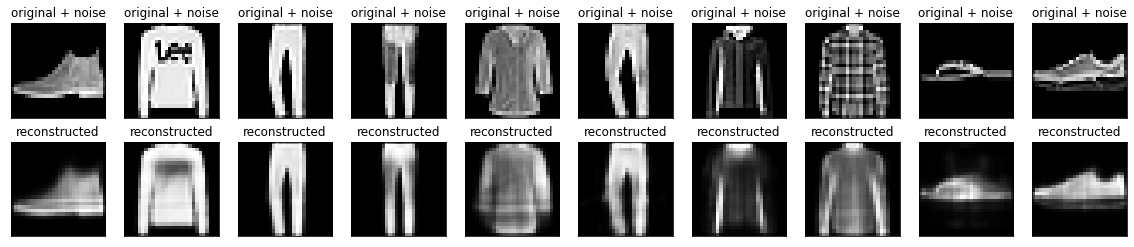

In [15]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test[i]))

    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()

## Denoising Autoencoder
Denoising autoencoders create a corrupted copy of the input by introducing some noise. This helps to avoid the autoencoders to copy the input to the output without learning features about the data. These autoencoders take a partially corrupted input while training to recover the original undistorted input. 

In [16]:
(x_train, _), (x_test, _) = fashion_mnist.load_data()

In [17]:
x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train[..., tf.newaxis]
x_test = x_test[..., tf.newaxis]

print(x_train.shape)

(60000, 28, 28, 1)


In [18]:
noise_factor = 0.2
x_train_noisy = x_train + noise_factor * tf.random.normal(shape=x_train.shape) 
x_test_noisy = x_test + noise_factor * tf.random.normal(shape=x_test.shape) 

x_train_noisy = tf.clip_by_value(x_train_noisy, clip_value_min=0., clip_value_max=1.)
x_test_noisy = tf.clip_by_value(x_test_noisy, clip_value_min=0., clip_value_max=1.)


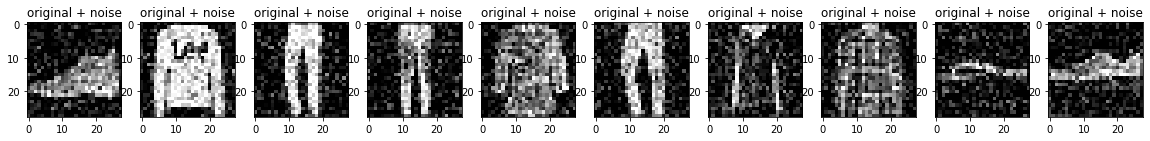

In [19]:
n = 10
plt.figure(figsize=(20, 2))
for i in range(n):
    ax = plt.subplot(1, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
plt.show()

In [20]:
class Denoise(Model):
  def __init__(self):
    super(Denoise, self).__init__()
    self.encoder = tf.keras.Sequential([
      layers.Input(shape=(28, 28, 1)),
      layers.Conv2D(16, (3, 3), activation='relu', padding='same', strides=2),
      layers.Conv2D(8, (3, 3), activation='relu', padding='same', strides=2)])

    self.decoder = tf.keras.Sequential([
      layers.Conv2DTranspose(8, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2DTranspose(16, kernel_size=3, strides=2, activation='relu', padding='same'),
      layers.Conv2D(1, kernel_size=(3, 3), activation='sigmoid', padding='same')])

  def call(self, x):
    encoded = self.encoder(x)
    decoded = self.decoder(encoded)
    return decoded

autoencoder = Denoise()

In [21]:
autoencoder.compile(optimizer='adam', loss=losses.MeanSquaredError())

In [22]:
autoencoder.fit(x_train_noisy, x_train,
                epochs=10,
                shuffle=True,
                validation_data=(x_test_noisy, x_test))

Epoch 1/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0360 - val_loss: 0.0116
Epoch 2/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0110 - val_loss: 0.0101
Epoch 3/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0099 - val_loss: 0.0094
Epoch 4/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0093 - val_loss: 0.0091
Epoch 5/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0089 - val_loss: 0.0086
Epoch 6/10
1875/1875 [==============================] - 70s 38ms/step - loss: 0.0086 - val_loss: 0.0085
Epoch 7/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0084 - val_loss: 0.0083
Epoch 8/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0083 - val_loss: 0.0084
Epoch 9/10
1875/1875 [==============================] - 71s 38ms/step - loss: 0.0082 - val_loss: 0.0082
Epoch 10/10
1875/1875 [==============================] - 71s 38m

In [23]:
autoencoder.encoder.summary()

Model: "sequential_4"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 14, 14, 16)        160       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 7, 7, 8)           1160      
Total params: 1,320
Trainable params: 1,320
Non-trainable params: 0
_________________________________________________________________


In [24]:
autoencoder.decoder.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_transpose (Conv2DTran (None, 14, 14, 8)         584       
_________________________________________________________________
conv2d_transpose_1 (Conv2DTr (None, 28, 28, 16)        1168      
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 28, 28, 1)         145       
Total params: 1,897
Trainable params: 1,897
Non-trainable params: 0
_________________________________________________________________


In [25]:
encoded_imgs = autoencoder.encoder(x_test).numpy()
decoded_imgs = autoencoder.decoder(encoded_imgs).numpy()

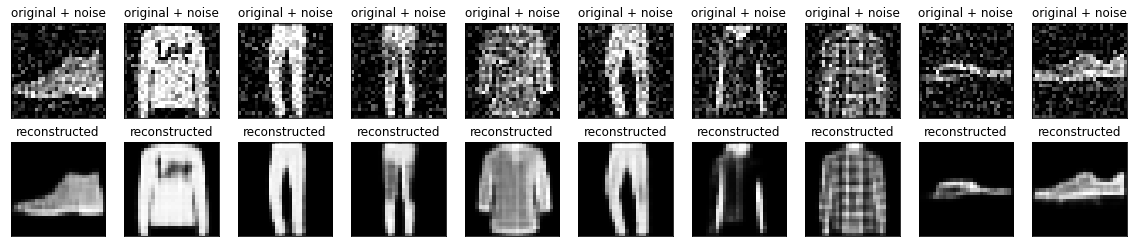

In [26]:
n = 10
plt.figure(figsize=(20, 4))
for i in range(n):

    # display original + noise
    ax = plt.subplot(2, n, i + 1)
    plt.title("original + noise")
    plt.imshow(tf.squeeze(x_test_noisy[i]))
    plt.gray()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)

    # display reconstruction
    bx = plt.subplot(2, n, i + n + 1)
    plt.title("reconstructed")
    plt.imshow(tf.squeeze(decoded_imgs[i]))
    plt.gray()
    bx.get_xaxis().set_visible(False)
    bx.get_yaxis().set_visible(False)
plt.show()